<a href="https://colab.research.google.com/github/vaniizzz/GeneralTest_EXXA5/blob/main/GeneralTest_EXXA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!unzip /content/drive/MyDrive/Protoplanetary_Disks/continuum_data_subset-20250401T161258Z-001.zip -d /content/fits_data/


Archive:  /content/drive/MyDrive/Protoplanetary_Disks/continuum_data_subset-20250401T161258Z-001.zip
  inflating: /content/fits_data/continuum_data_subset/planet99_00400_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet92_00530_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet97_00282_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet9_00916_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet92_00296_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet96_00808_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet96_00646_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet9_00440_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet86_00602_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet8_00214_1250.fits  
  inflating: /content/fits_data/continuum_data_subset/planet86_00414_1250.fits  
  inflating

In [7]:
!ls /content/fits_data/


continuum_data_subset


In [8]:
filename = "/content/fits_data/your_fits_file.fits"


In [10]:
import os
print(os.listdir())


['.config', 'fits_data', 'drive', 'sample_data']


In [12]:
import os
print(os.listdir('/content'))


['.config', 'fits_data', 'drive', 'sample_data']


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
zip_path = "/content/drive/MyDrive/continuum_data_subset-20250401T161258Z-001.zip"


In [16]:
import os

data_path = "/content/fits_data/continuum_data_subset"
print(os.listdir(data_path))  # List files in the directory


['planet88_00674_1250.fits', 'planet72_00164_1250.fits', 'planet30_00166_1250.fits', 'planet35_00114_1250.fits', 'planet72_00236_1250.fits', 'planet2_00154_1250.fits', 'planet92_00296_1250.fits', 'planet55_00394_1250.fits', 'planet48_00154_1250.fits', 'planet50_00420_1250.fits', 'planet103_00718_1250.fits', 'planet17_00648_1250.fits', 'planet34_00418_1250.fits', 'planet6_00370_1250.fits', 'planet43_00358_1250.fits', 'planet33_00310_1250.fits', 'planet22_00198_1250.fits', 'planet11_00886_1250.fits', 'planet16_00614_1250.fits', 'planet60_00344_1250.fits', 'planet54_00984_1250.fits', 'planet45_00608_1250.fits', 'planet13_00324_1250.fits', 'planet102_00142_1250.fits', 'planet8_00128_1250.fits', 'planet24_00394_1250.fits', 'planet1_00490_1250.fits', 'planet11_00700_1250.fits', 'planet14_00314_1250.fits', 'planet10_00816_1250.fits', 'planet3_00654_1250.fits', 'planet18_00942_1250.fits', 'planet9_00440_1250.fits', 'planet48_00468_1250.fits', 'planet101_00972_1250.fits', 'planet8_00320_1250.fi

In [17]:
!pip install astropy opencv-python-headless scikit-learn


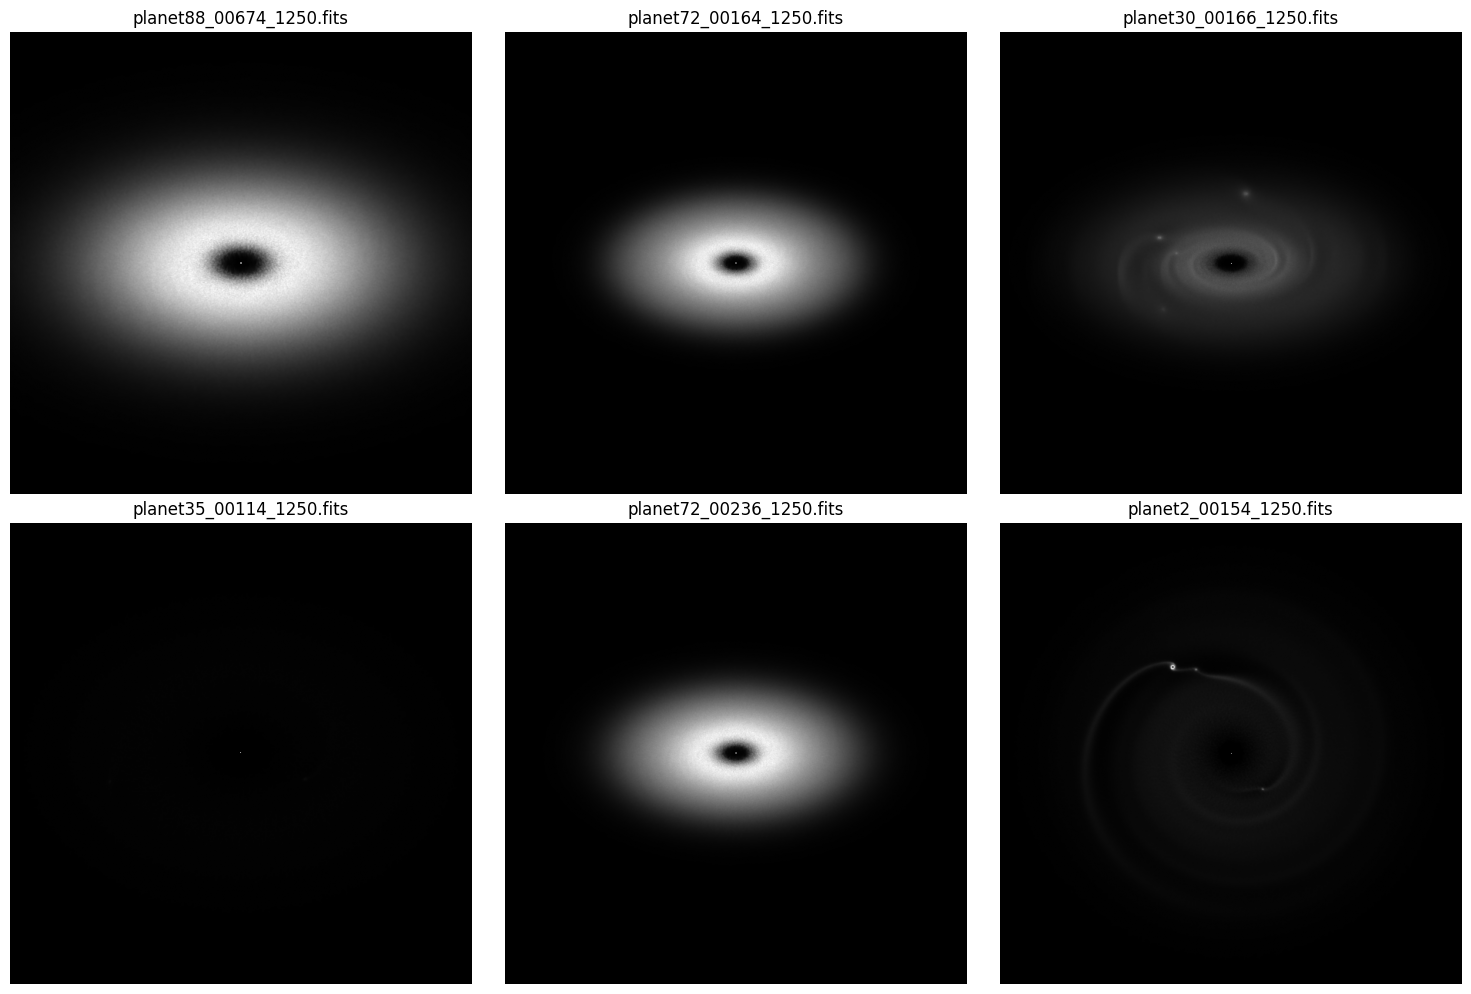

NaN count in features: 0
planet88_00674_1250.fits: Cluster 1
planet72_00164_1250.fits: Cluster 2
planet30_00166_1250.fits: Cluster 0
planet35_00114_1250.fits: Cluster 0
planet72_00236_1250.fits: Cluster 2
planet2_00154_1250.fits: Cluster 0
planet92_00296_1250.fits: Cluster 0
planet55_00394_1250.fits: Cluster 2
planet48_00154_1250.fits: Cluster 1
planet50_00420_1250.fits: Cluster 0
planet103_00718_1250.fits: Cluster 0
planet17_00648_1250.fits: Cluster 0
planet34_00418_1250.fits: Cluster 2
planet6_00370_1250.fits: Cluster 1
planet43_00358_1250.fits: Cluster 0
planet33_00310_1250.fits: Cluster 0
planet22_00198_1250.fits: Cluster 0
planet11_00886_1250.fits: Cluster 0
planet16_00614_1250.fits: Cluster 0
planet60_00344_1250.fits: Cluster 0
planet54_00984_1250.fits: Cluster 0
planet45_00608_1250.fits: Cluster 0
planet13_00324_1250.fits: Cluster 0
planet102_00142_1250.fits: Cluster 0
planet8_00128_1250.fits: Cluster 0
planet24_00394_1250.fits: Cluster 0
planet1_00490_1250.fits: Cluster 0
plane

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from astropy.io import fits
from sklearn.cluster import KMeans
from skimage.filters import sobel

# Define path to FITS files
data_path = "/content/fits_data/continuum_data_subset"

# Get list of FITS files
fits_files = [f for f in os.listdir(data_path) if f.endswith(".fits")]

# Improved function to load and process FITS image
def load_fits_image(file_path):
    with fits.open(file_path) as hdul:
        image_data = hdul[0].data

    # Handle multi-dimensional data properly
    while image_data.ndim > 2:
        image_data = image_data[0]  # Keep reducing dimensions until we have a 2D image

    # Handle NaN and Inf values
    image_data = np.nan_to_num(image_data, nan=0.0, posinf=np.max(image_data[np.isfinite(image_data)]), neginf=np.min(image_data[np.isfinite(image_data)]))

    # Normalize to [0, 1] range
    min_val = np.min(image_data)
    max_val = np.max(image_data)
    if max_val > min_val:  # Avoid division by zero
        image_data = (image_data - min_val) / (max_val - min_val)

    return image_data

# Process and visualize first few images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, file in enumerate(fits_files[:6]):
    if i < len(axes):  # Safety check to prevent index errors
        image = load_fits_image(os.path.join(data_path, file))
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(file)
        axes[i].axis("off")

plt.tight_layout()
plt.show()

# Convert images into feature vectors for clustering
features = []
for file in fits_files:
    image = load_fits_image(os.path.join(data_path, file))
    image = cv2.resize(image, (128, 128))  # Resize for consistency
    edges = sobel(image)  # Apply edge detection
    features.append(edges.flatten())

features = np.array(features)

# Handle NaNs in features
print("NaN count in features:", np.isnan(features).sum())  # Debugging step
if np.isnan(features).sum() > 0:
    features = np.nan_to_num(features)

# Apply K-Means Clustering
num_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(features)
labels = kmeans.labels_

# Print clustering results
for file, label in zip(fits_files, labels):
    print(f"{file}: Cluster {label}")